In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 

In [2]:
DEMO = pd.read_csv('LPOINT_BIG_COMP_01_DEMO.csv',encoding='cp949') # 고객정보
PDDE = pd.read_csv('LPOINT_BIG_COMP_02_PDDE.csv', parse_dates = [6],encoding='cp949') # 구매정보
CLAC = pd.read_csv('LPOINT_BIG_COMP_04_PD_CLAC.csv',encoding='cp949') # 상품 정보

C:\Users\darle\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
DF = pd.merge(PDDE, DEMO, on='cust')
DF = pd.merge(DF, CLAC, on='pd_c')
DF = DF.loc[(DF['ages'] == '20대')&(DF['cop_c'].apply(lambda x: x in ['A02', 'A03', 'A04']))]
print(DF.shape)
DF.head()

(196262, 16)


,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,pd_nm,clac_hlv_nm,clac_mcls_nm
654,M496844384,A02191496496,1,A02,A020053,PD0290,2021-05-08,17,39000.0,1,여성,20대,Z17,남성티셔츠,남성의류,남성의류상의
2574,M748140584,A02262444001,1,A02,A020080,PD0290,2021-01-08,17,20000.0,2,남성,20대,Z11,남성티셔츠,남성의류,남성의류상의
2575,M748140584,A02262444001,1,A02,A020080,PD0290,2021-01-08,17,9000.0,9,남성,20대,Z11,남성티셔츠,남성의류,남성의류상의
2576,M748140584,A02262444001,1,A02,A020080,PD0290,2021-01-08,17,900.0,9,남성,20대,Z11,남성티셔츠,남성의류,남성의류상의
3166,M395590139,A02064243742,1,A02,A020012,PD0290,2021-02-01,11,600.0,6,여성,20대,Z17,남성티셔츠,남성의류,남성의류상의


In [17]:
factor3 = ['샐러드','떠먹는요구르트']

fa3df = DF.loc[DF['pd_nm'].apply(lambda x: x in factor3)]
fa3df.tail()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,pd_nm,clac_hlv_nm,clac_mcls_nm
3275883,M317515254,A04100924019,1,A04,A041592,PD1246,2021-10-16,23,2200.0,1,남성,20대,Z01,샐러드,조리식품,냉장조리
3275884,M317515254,A04100924019,1,A04,A041592,PD1246,2021-10-16,23,2200.0,1,남성,20대,Z01,샐러드,조리식품,냉장조리
3275893,M925008386,A04126443424,1,A04,A042214,PD1246,2021-12-23,15,2200.0,1,남성,20대,Z15,샐러드,조리식품,냉장조리
3275895,M779312191,A04008404134,1,A04,A040507,PD1246,2021-02-04,17,2200.0,1,여성,20대,Z13,샐러드,조리식품,냉장조리
3275909,M470886431,A04062878881,1,A04,A045234,PD1246,2021-07-15,16,3500.0,1,여성,20대,Z14,샐러드,조리식품,냉장조리


In [23]:
times_3 = fa3df.groupby(["de_hr","pd_nm"])['cust'].count()
times_3_df = pd.DataFrame(times_3, columns=['cust'])

times_3_df.reset_index(inplace=True)
times_3_df.head()

,de_hr,pd_nm,cust
0,0,떠먹는요구르트,5
1,1,떠먹는요구르트,6
2,1,샐러드,1
3,2,떠먹는요구르트,2
4,3,떠먹는요구르트,3


In [27]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [24]:
times_3_df["pd_nm"].dropna()
times_3_df["pd_nm"].unique()

array(['떠먹는요구르트', '샐러드'], dtype=object)

<AxesSubplot:title={'center':'떠먹는 요구르트와 샐러드 시간별 구매고객 수'}, xlabel='시간대', ylabel='구매 고객 수'>

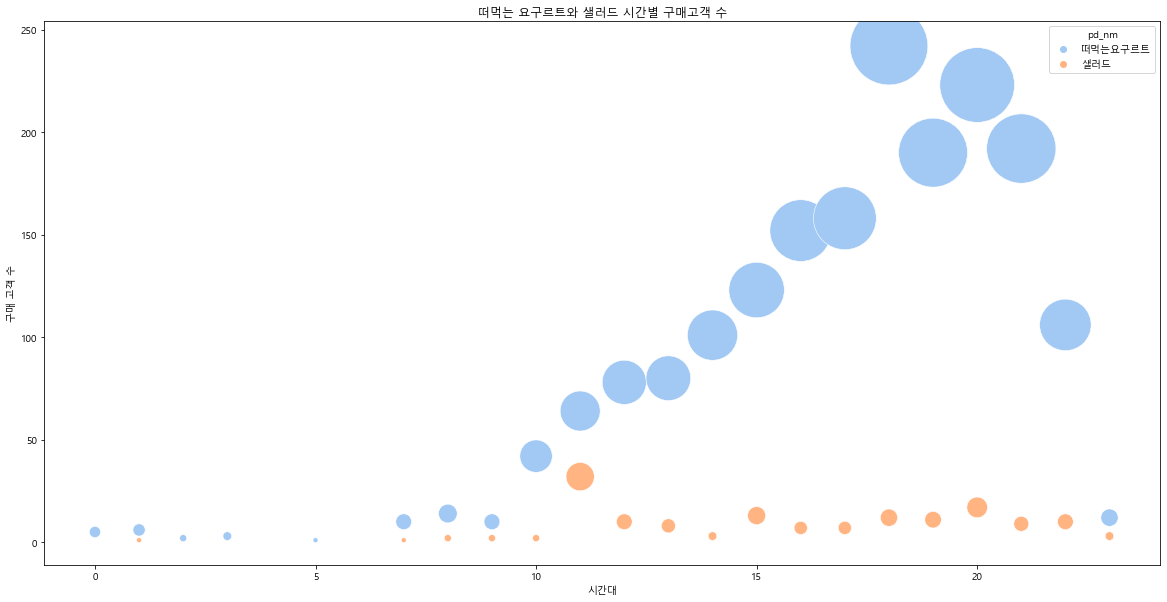

In [46]:
plt.figure(figsize=(20, 10))
plt.title('떠먹는 요구르트와 샐러드 시간별 구매고객 수')
plt.xlabel('시간대')
plt.ylabel('구매 고객 수')
sns.scatterplot(x=times_3_df['de_hr'],y=times_3_df['cust'],hue=times_3_df["pd_nm"],s=times_3_df['cust']*25)